## Importación de librerías

In [1]:
import os
os.chdir(os.path.dirname(os.getcwd())) # Change working directory to parent directory

In [2]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from test_harness.datasets.dataset import Dataset
from test_harness.experiments._2_response_uncertainty_experiment import UncertaintyKSExperiment
from test_harness.experiments._3_margin_uncertainty_experiment import UncertaintyX2Experiment
from test_harness.experiments._4_margin_threshold_experiment import MarginThresholdExperiment

from test_harness.utils.utils import plot_experiment_error
import matplotlib.pyplot as plt

%matplotlib inline

## Preparación de los experimentos

In [3]:
def define_uncertainty_ks(model, param_grid, dataset, significance_thresh, delete_csv=False):
    # response uncertainty experiment
    uncertainty_ks = UncertaintyKSExperiment(
        model=model,
        dataset=dataset,
        param_grid=param_grid,
        k=5,
        significance_thresh=significance_thresh,
        delete_csv=delete_csv
    )
    uncertainty_ks.run()
    return uncertainty_ks

    
def define_uncertainty_x2(model, param_grid, dataset, significance_thresh, margin_width, delete_csv=False):
    # margin uncertainty experiment
    uncertainty_x2 = UncertaintyX2Experiment(
        model=model,
        dataset=dataset,
        param_grid=param_grid,
        k=5,
        significance_thresh=significance_thresh,
        margin_width=margin_width,
        delete_csv=delete_csv
    )
    uncertainty_x2.run()
    return uncertainty_x2

    
def define_margin_threshold_s(model, param_grid, dataset, margin_width, sensitivity, delete_csv=False):
    # margin threshold experiment
    margin_threshold_s = MarginThresholdExperiment(
        model=model,
        dataset=dataset,
        param_grid=param_grid,
        k=5,
        margin_width=margin_width,
        sensitivity=sensitivity,
        delete_csv=delete_csv
    )
    margin_threshold_s.run()
    return margin_threshold_s

## Carga de datos

In [4]:
# Load data
change_points = [10000]

column_mapping = {
    "target": "target",
    "int_features": ["x_cat_0"],
    "float_features": ["x_num_0", "x_num_1", "x_num_2", "x_num_3"],
}

dataset_RT_abr = pd.read_csv("./datasets/_13_data_RT_abrupto.csv")
name_ds = "param_selection/data_RT_abrupto2"

model = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=5)
param_grid = {"clf__n_estimators": [5], "clf__max_depth": [5]}

## Ejecución de experimentos

### Response uncertainty experiment (exp 2)

Running experiments with window size = 500


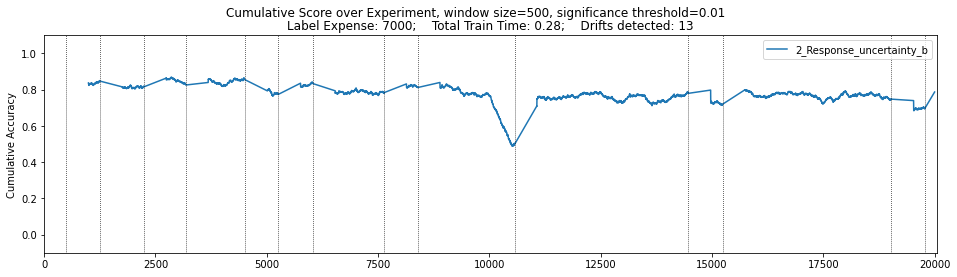

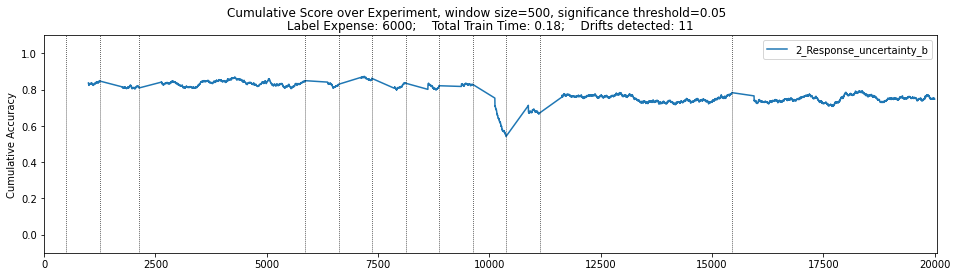

Running experiments with window size = 1500


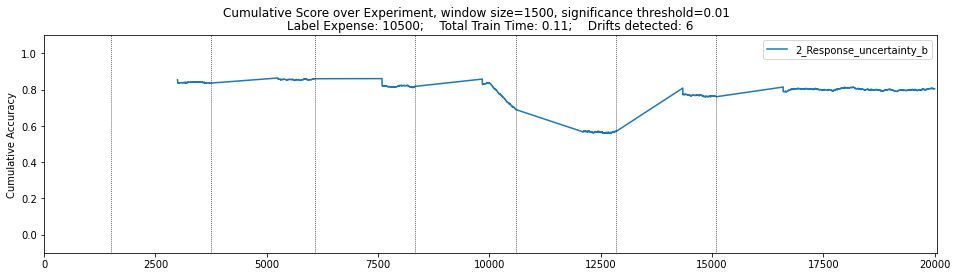

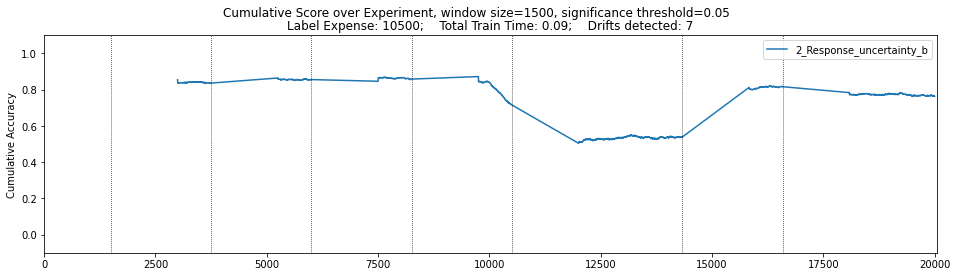

Running experiments with window size = 2500


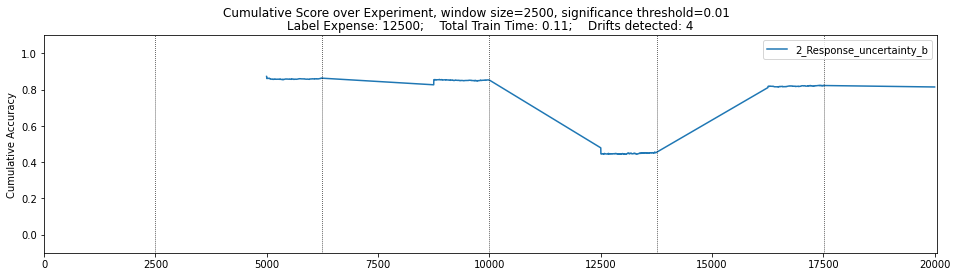

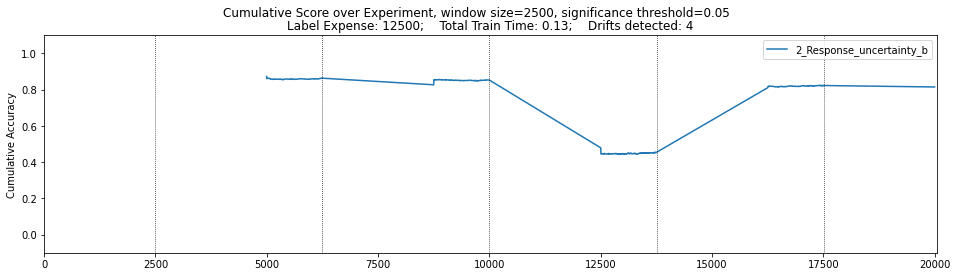

In [5]:
# Run experiments
delete_csv=True

for size_w in [500, 1500, 2500]:

    # Define dataset
    dataset = Dataset(name_ds, full_df=dataset_RT_abr, column_mapping=column_mapping, window_size=size_w)

    # Run experiments
    print(f"Running experiments with window size = {dataset.window_size}")
    
    for significance_thresh in [0.01, 0.05]:
        exp = define_uncertainty_ks(model, param_grid, dataset, significance_thresh, delete_csv=delete_csv)
        delete_csv=False
    
        #Plot results
        fig, ax = plt.subplots(figsize = (16,4))
        plot_experiment_error(exp, show_trainings=True, ax=ax)
        fig.suptitle(f"Cumulative Score over Experiment, window size={dataset.window_size}, significance threshold={significance_thresh}")
        plt.show()

### Margin uncertainty experiment (exp 3)

Running experiments with window size = 500


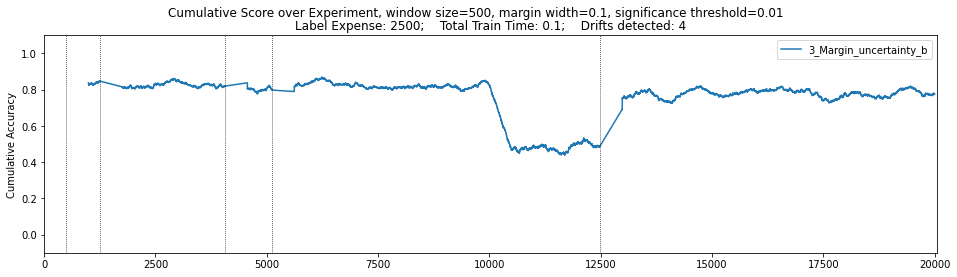

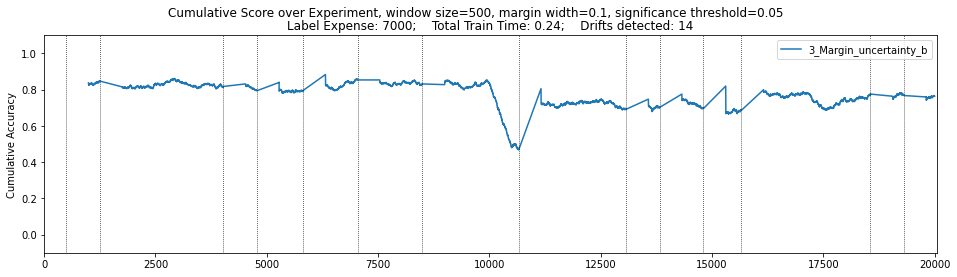

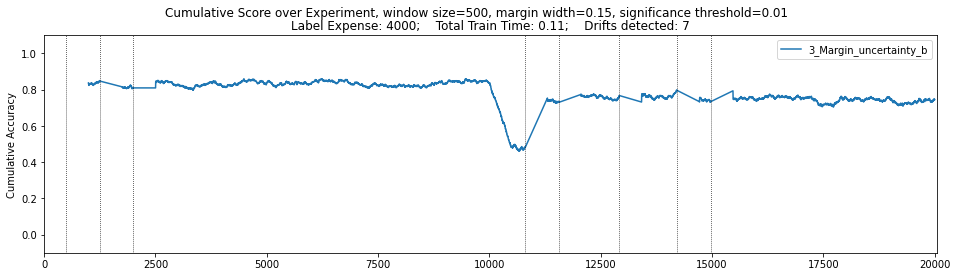

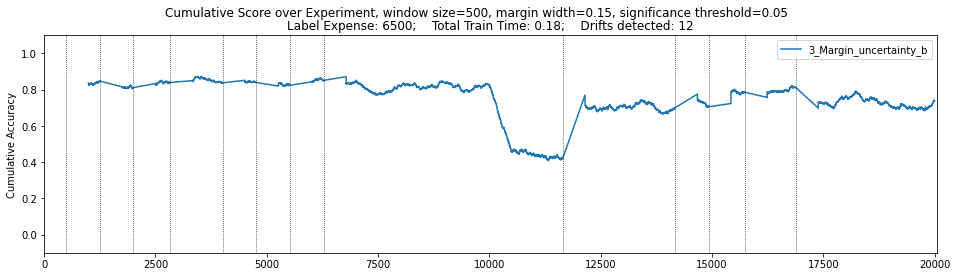

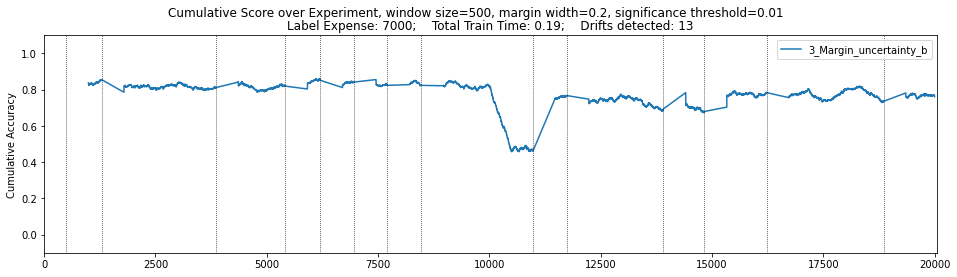

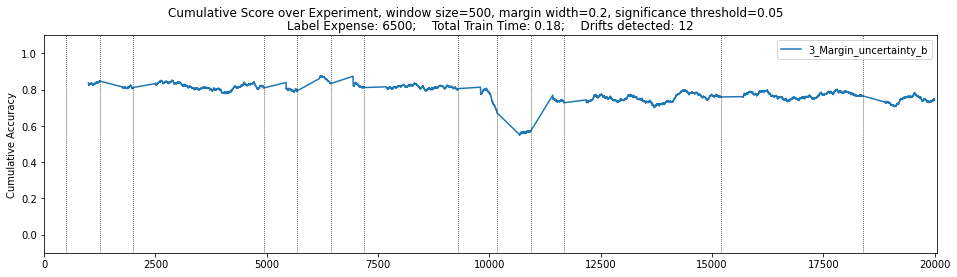

Running experiments with window size = 1500


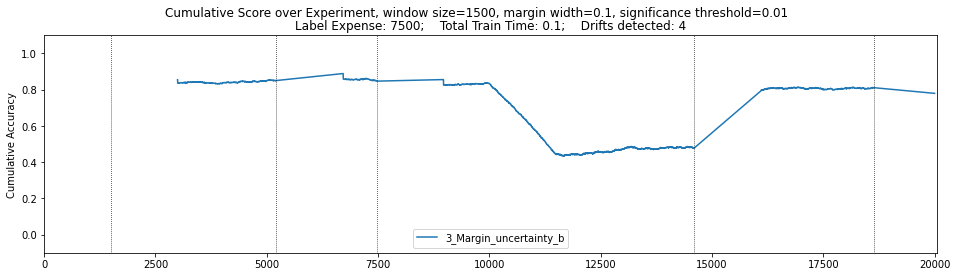

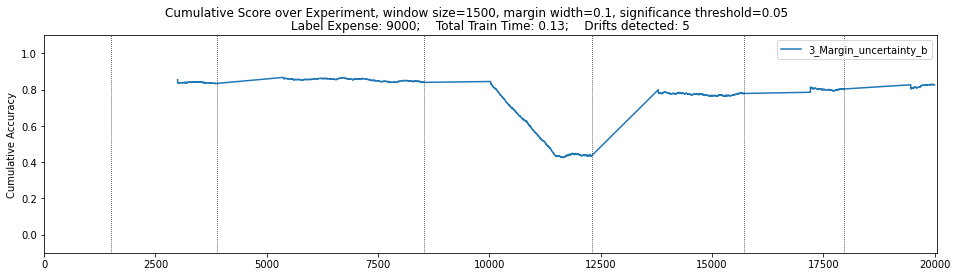

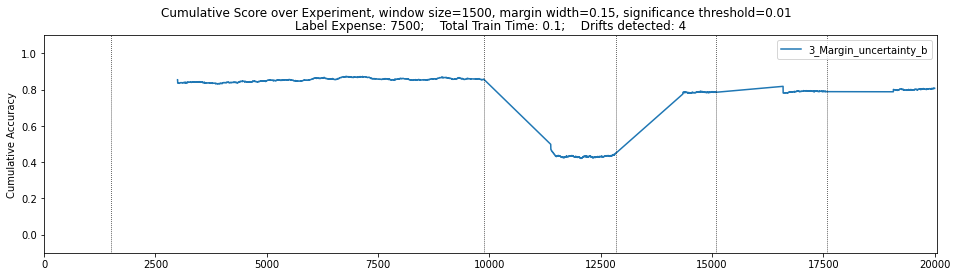

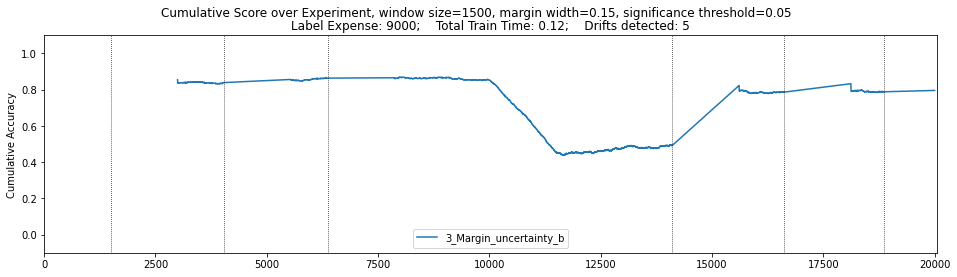

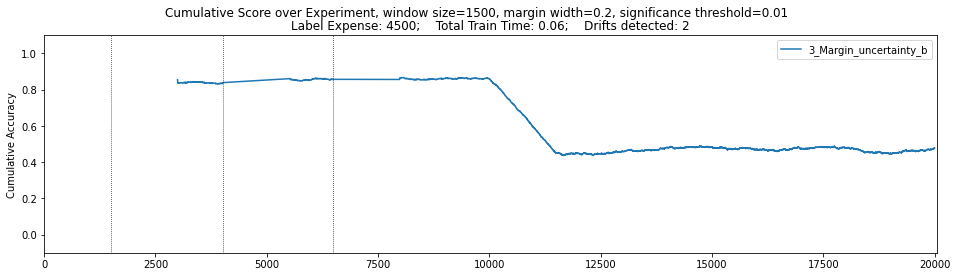

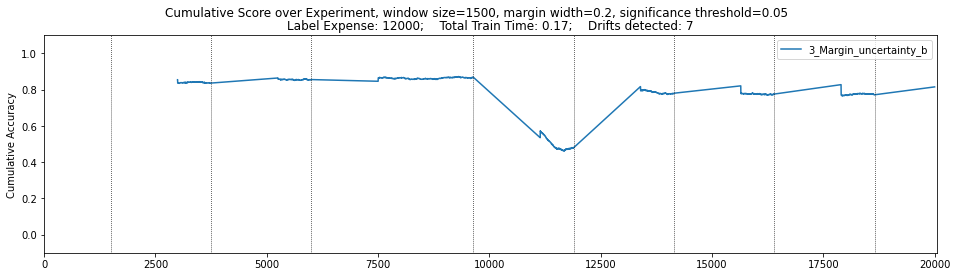

Running experiments with window size = 2500


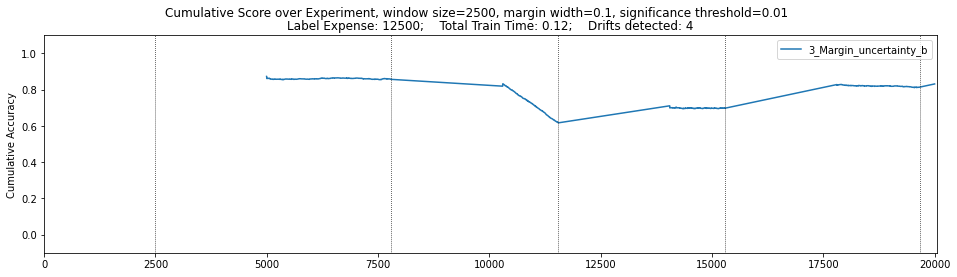

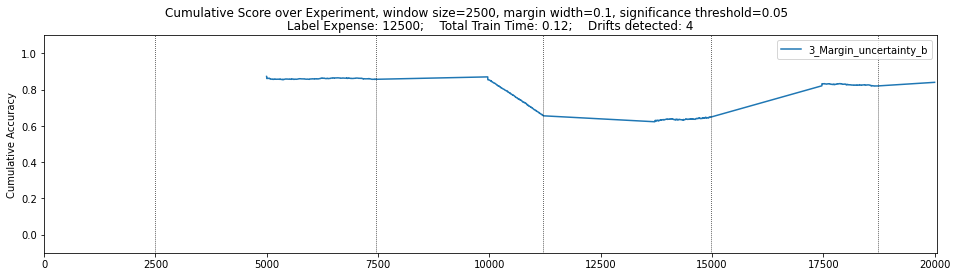

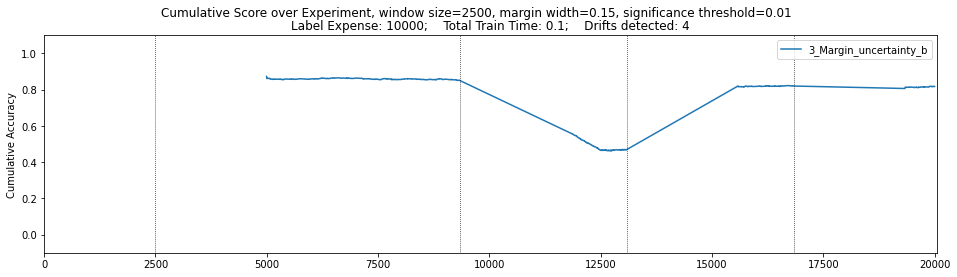

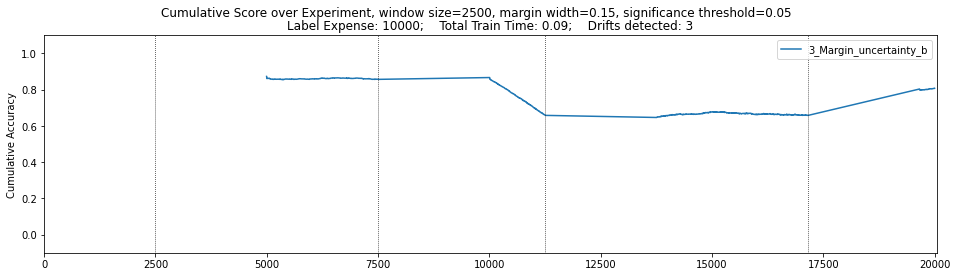

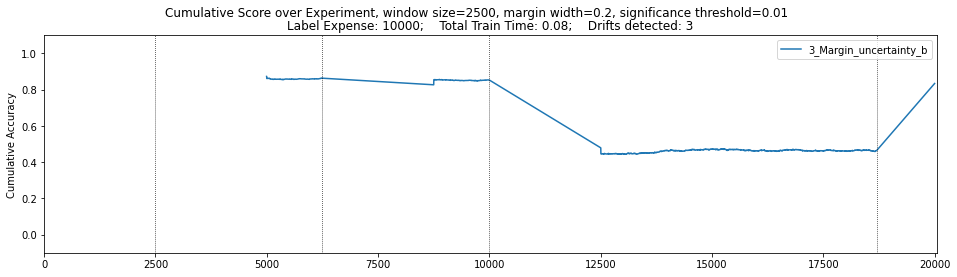

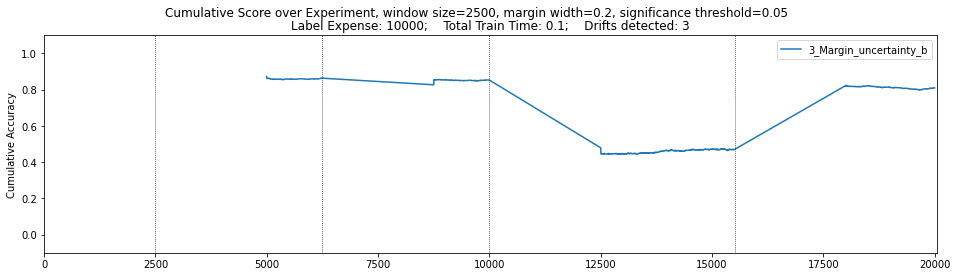

In [6]:
# Run experiments
delete_csv=True

for size_w in [500, 1500, 2500]:

    # Define dataset
    dataset = Dataset(name_ds, full_df=dataset_RT_abr, column_mapping=column_mapping, window_size=size_w)

    # Run experiments
    print(f"Running experiments with window size = {dataset.window_size}")
    
    for margin_width in [0.1, 0.15, 0.2]:
        for significance_thresh in [0.01, 0.05]:
            exp = define_uncertainty_x2(model, param_grid, dataset, significance_thresh, margin_width, delete_csv=delete_csv)
            delete_csv=False
        
            #Plot results
            fig, ax = plt.subplots(figsize = (16,4))
            plot_experiment_error(exp, show_trainings=True, ax=ax)
            fig.suptitle(f"Cumulative Score over Experiment, window size={dataset.window_size}, margin width={margin_width}, significance threshold={significance_thresh}")
            plt.show()

Running experiments with window size = 500


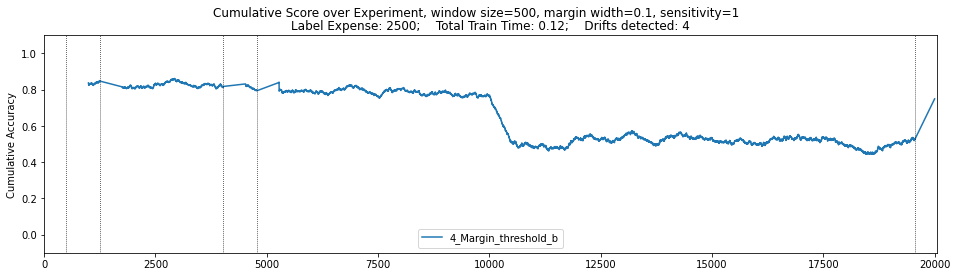

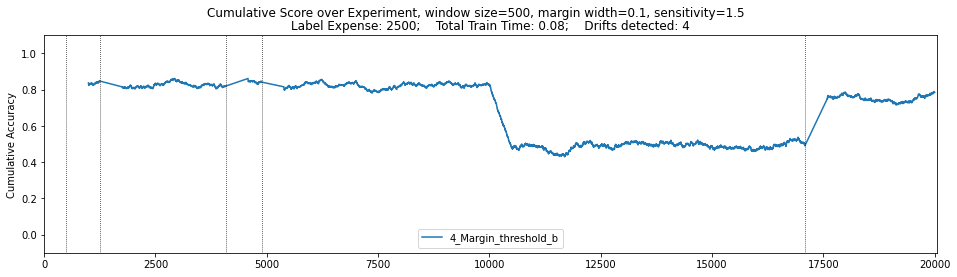

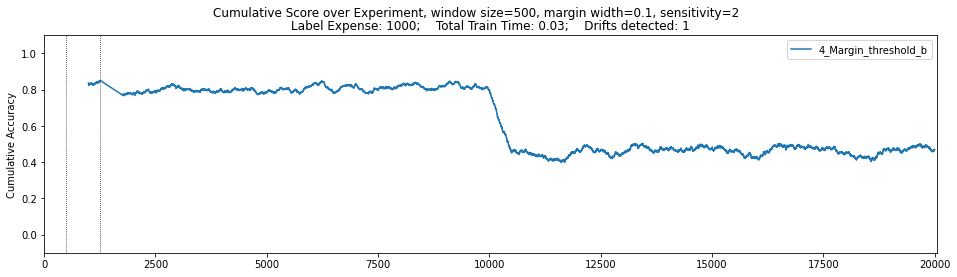

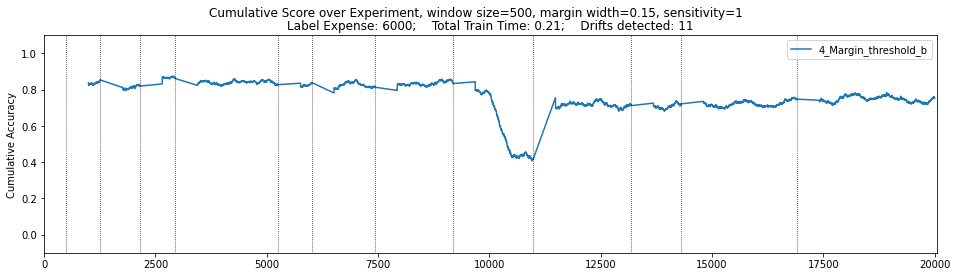

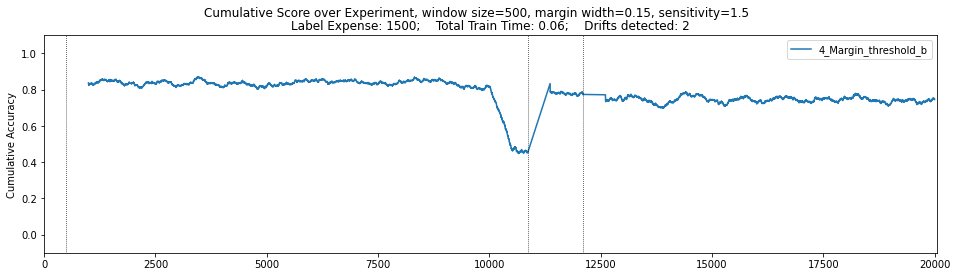

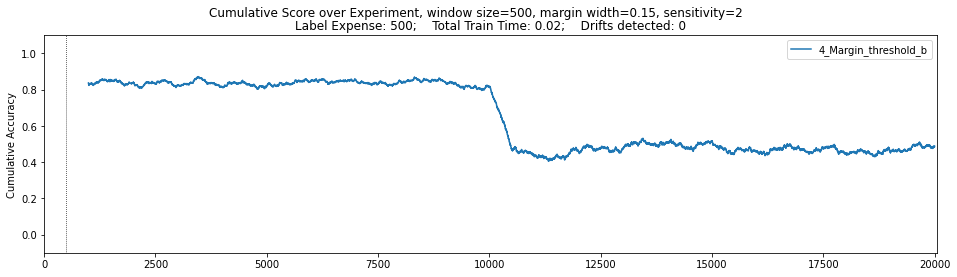

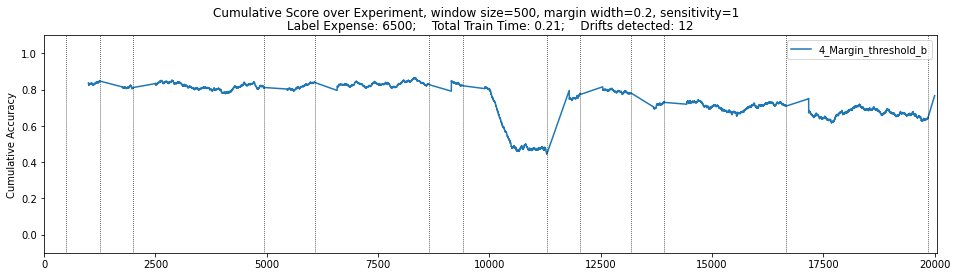

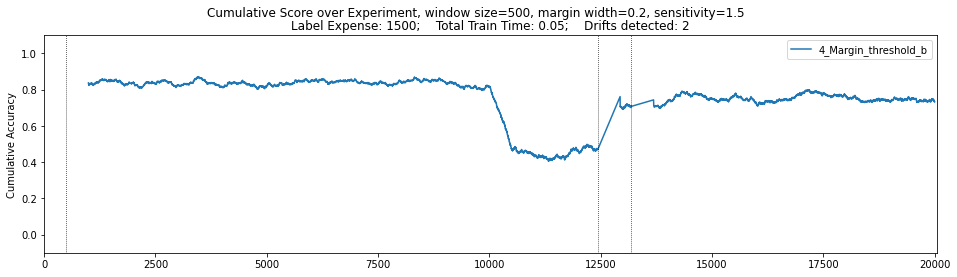

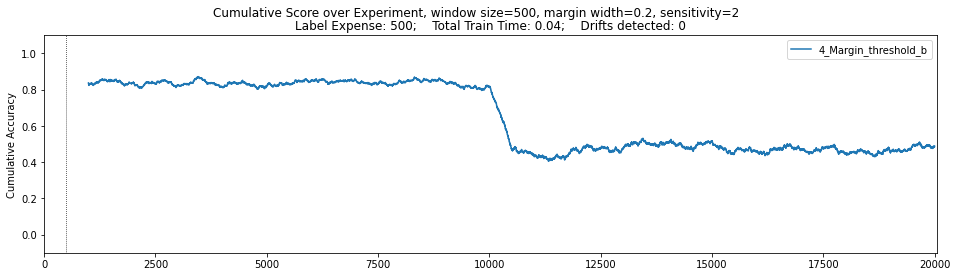

Running experiments with window size = 1500


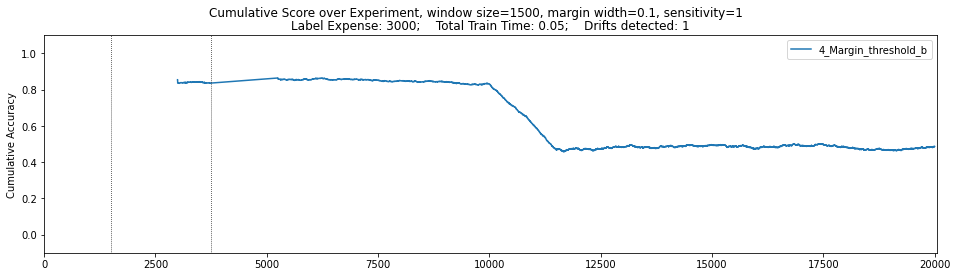

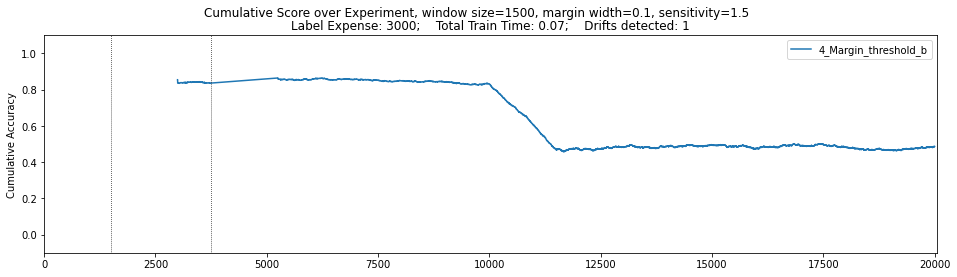

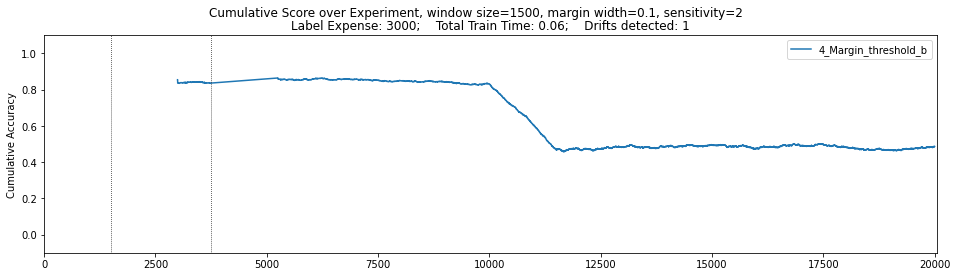

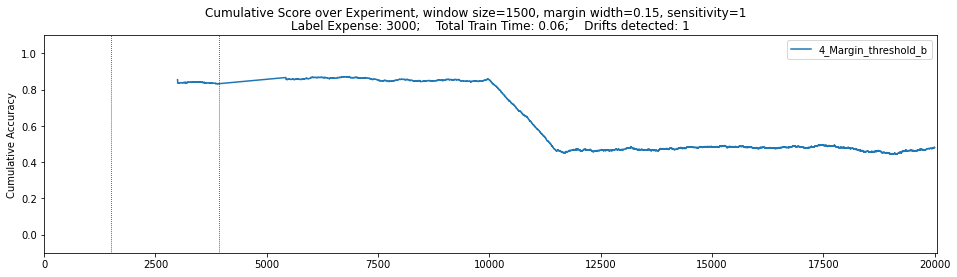

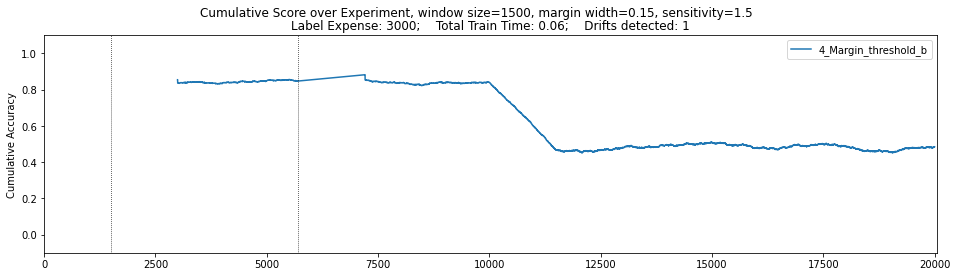

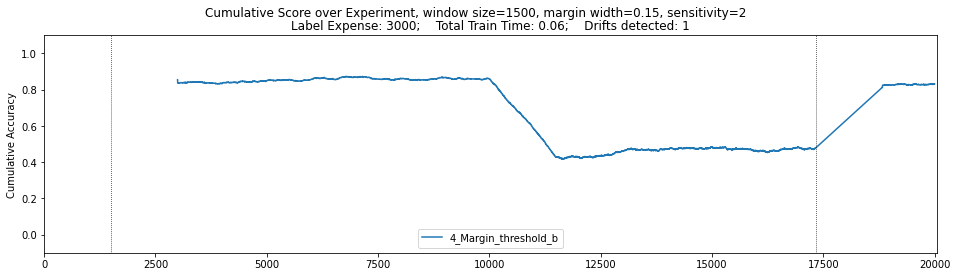

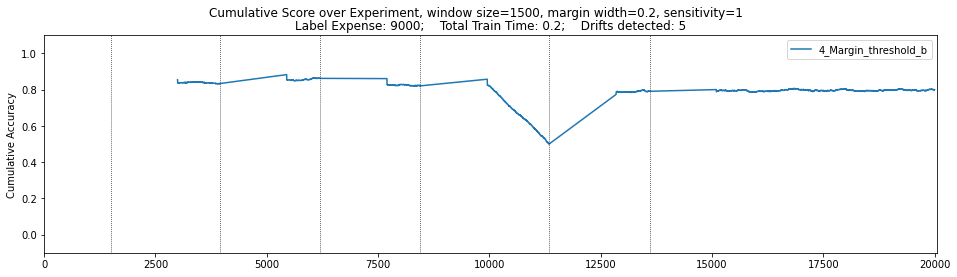

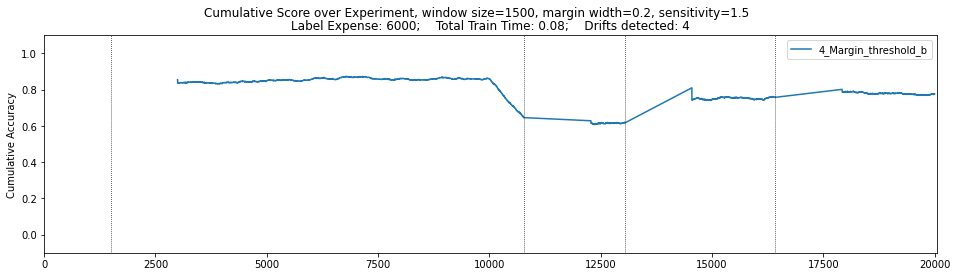

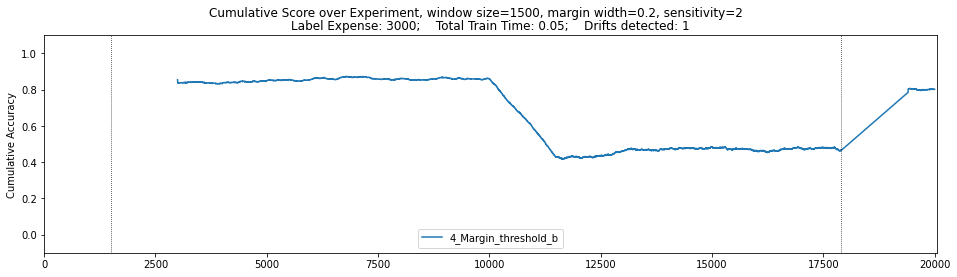

Running experiments with window size = 2500


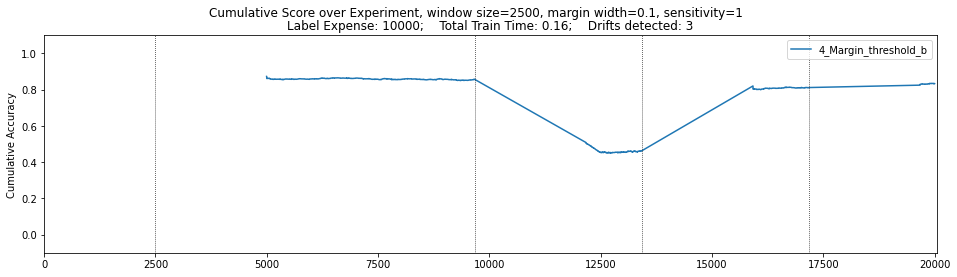

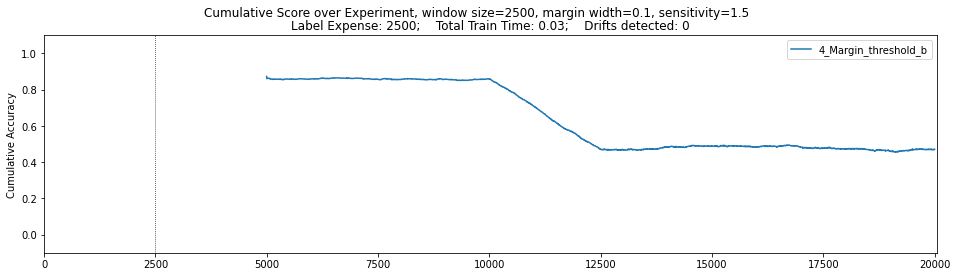

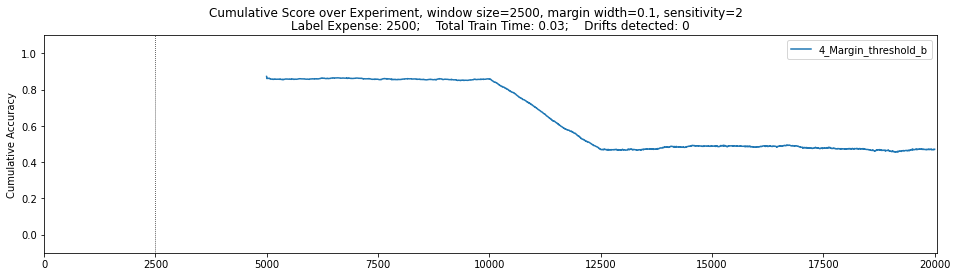

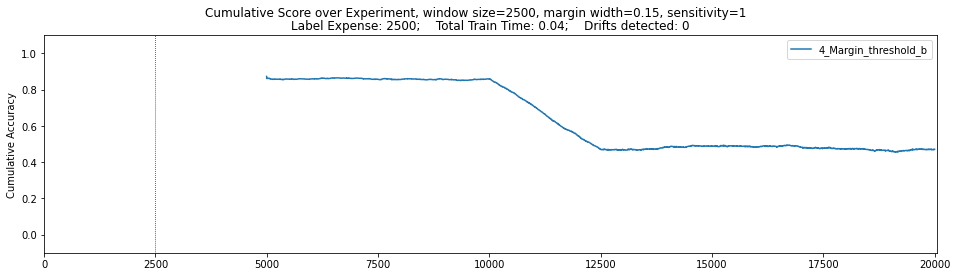

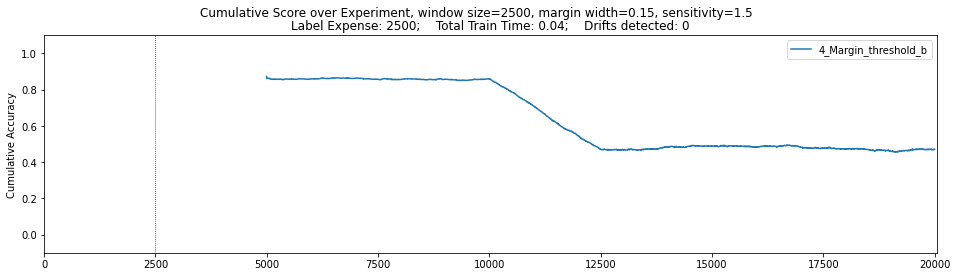

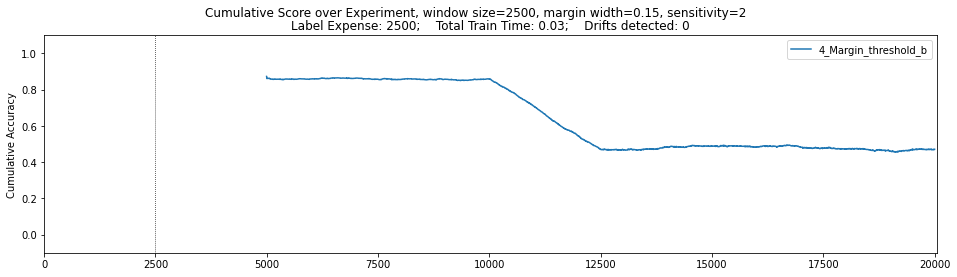

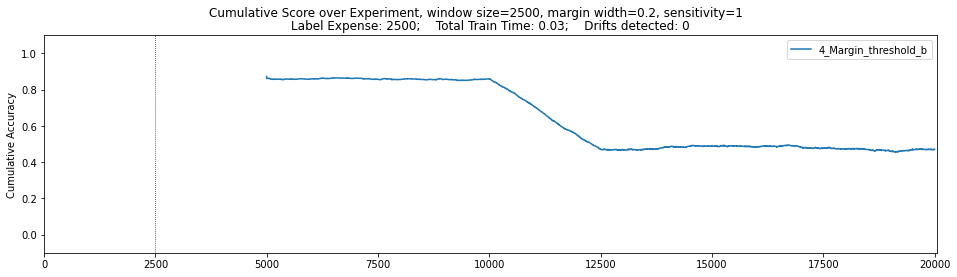

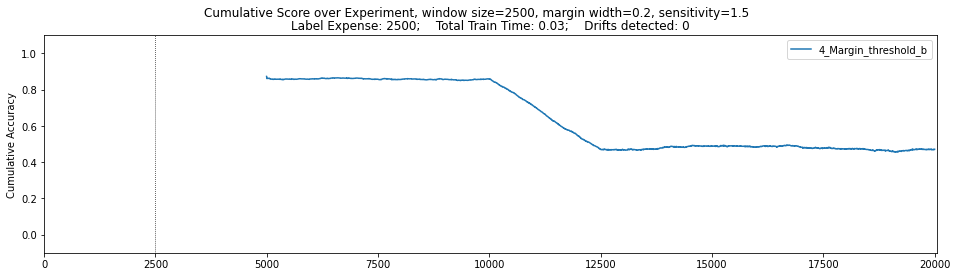

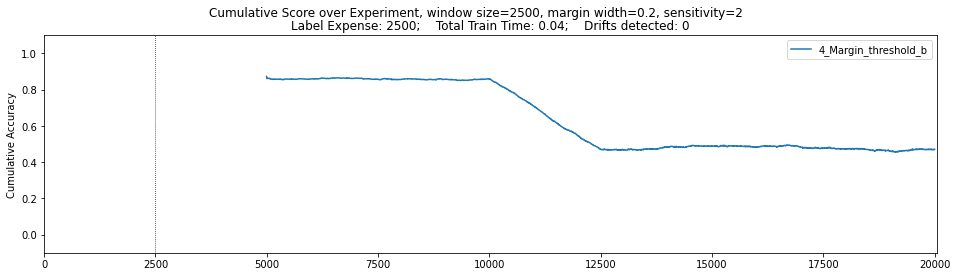

In [7]:
# Run experiments
delete_csv=True

for size_w in [500, 1500, 2500]:

    # Define dataset
    dataset = Dataset(name_ds, full_df=dataset_RT_abr, column_mapping=column_mapping, window_size=size_w)

    # Run experiments
    print(f"Running experiments with window size = {dataset.window_size}")
    
    for margin_width in [0.1, 0.15, 0.2]:
        for sensitivity in [1, 1.5, 2]:
            exp = define_margin_threshold_s(model, param_grid, dataset, margin_width, sensitivity, delete_csv=delete_csv)
            delete_csv=False
        
            #Plot results
            fig, ax = plt.subplots(figsize = (16,4))
            plot_experiment_error(exp, show_trainings=True, ax=ax)
            fig.suptitle(f"Cumulative Score over Experiment, window size={dataset.window_size}, margin width={margin_width}, sensitivity={sensitivity}")
            plt.show()